# KNN - Correntes de motor

Testando 30 rodadas com algoritmo **KNN** nos conjuntos de dados de correntes de motor com dados extraídos por _dwt_.

## Importando Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Declarando funções

In [3]:
def load_correntes():
    '''Retorna os 3 arquivos carregados em um único array'''
    return np.append(
                arr=np.load("corrente1.npy"),
                axis=0,
                values=np.append(
                        arr=np.load("corrente2.npy"),
                        values=np.load("corrente3.npy"),
                        axis=0))

def binarize(matriz7x7):
    '''Recebe a matriz de confusão (7, 7) e retorna uma matriz (2, 2) com seus elementos agrupados'''
    mBinaria = np.array([[0, 0],[0, 0]])

    for linha in range(7):
        if linha == 0:
            mBinaria[0] = [matriz7x7[0][0], sum(matriz7x7[0][1:])]
        else:
            mBinaria[1] += [matriz7x7[linha][0], sum(matriz7x7[linha][1:])]

    return mBinaria

def normalize(line):
    '''Recebe uma linha da matriz e a retorna normalizada em relação ao total de elementos da linha'''
    total = sum(line)
    return np.array([x / total for x in line])

def test_30_knn(x, y, y_labels, k_vizinhos):
    '''
    Executa 30 rodadas com KNN, imprimindo o resultado da classificação e plotando a matriz de confusão.

    Ao final, retorna 3 listas, contendo a acurácia, a sensibilidade e a matriz de confusão (não normalizada) ao longo das 30 rodadas, respectivamente.
    '''
    # Armazena os resultados de acurácia, sensibilidade e matriz de confusão que ao final serão retornados
    irisAcc = []
    irisRec = []
    matrixProdada = []

    # Armazena as sementes já usadas para não haver repetição
    usedSeed = []

    for i in range(30):

        # Gerando inteiro aleatório para distribuição dos dados
        semente = randint(0, 8001)
        
        while semente in usedSeed:
            semente = randint(0, 8001)
        
        usedSeed.append(semente)

        # Separando dados para treino e teste
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=semente)

        # Instanciando classificador
        classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

        # Treinando modelo
        classifier.fit(X_train, y_train)

        # Realizando teste de classificação
        y_pred = classifier.predict(X_test)

        # Adicionando resultados à lista
        acc = accuracy_score(y_test, y_pred)
        irisAcc.append(acc)

        rec = recall_score(y_test, y_pred, average=None)
        irisRec.append(rec)

        matrixProdada.append(confusion_matrix(y_test, y_pred, normalize=None))

        # Exibindo resultados da rodada
        print(f"\n- RODADA {i} - Semente {semente} -\n")
        print("- Acurácia {accuracy} -\n- Sensibilidade {recall} -\n".format(accuracy=acc, recall=rec))

        print(classification_report(y_test, y_pred, target_names=y_labels))

        print("Matriz de confusão normalizada")
        plot_confusion_matrix(
            estimator=classifier,
            X=X_test,
            y_true=y_test,
            display_labels=y_labels,
            cmap=plt.cm.Blues,
            normalize='true'
        )
        plt.show()
    return irisAcc, irisRec, matrixProdada

## Características dos dados

| Características     |  Valor|
|:--------------------|------:|
| Classes             |      7|
| Amostras            |   7851|
| Dimensionalidade    |     38|

## Carregando dados e rótulos, e gerando _DataFrame_

In [4]:
# Carregando data
data = load_correntes()

# Carregando Rótulos
labels = [
    'DesvioD1','DesvioD2','DesvioD3','DesvioD4','DesvioD5','DesvioA5',
    'MeanAD1','MeanAD2','MeanAD3','MeanAD4','MeanAD5','MeanADA5',
    'MedianAD1','MedianAD2','MedianAD3','MedianAD4','MedianAD5','MedianADA5',
    'KurtosisD1','KurtosisD2','KurtosisD3','KurtosisD4','KurtosisD5','KurtosisA5',
    'SkewnessD1','SkewnessD2','SkewnessD3','SkewnessD4','SkewnessD5','SkewnessA5',
    'EnergiaD1','EnergiaD2','EnergiaD3','EnergiaD4','EnergiaD5','EnergiaA5',
    'frequencia','classe','carga'
]

target_labels = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Gerando DataFrame
chainDF = pd.DataFrame(data=data, columns=labels).fillna(value=0)

chainCompleteDF = chainDF.copy()

targetS = chainDF.pop('classe') # Removeu a coluna 'classe' de chainDF

## `chainDF`

`chainDF` é um _DataFrame_, uma tabela com o conjunto de dados carregados

In [5]:
chainDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DesvioD1,7851.0,0.011659,0.001102,0.000000,0.011175,0.011460,0.012027,0.018549
DesvioD2,7851.0,0.013451,0.001709,0.000000,0.012369,0.013052,0.014401,0.020684
DesvioD3,7851.0,0.017627,0.004701,0.000000,0.014061,0.016503,0.019949,0.036409
DesvioD4,7851.0,0.063597,0.030260,0.000000,0.040414,0.057861,0.080548,0.172226
DesvioD5,7851.0,0.310475,0.148925,0.000000,0.192664,0.282100,0.396623,0.832394
DesvioA5,7851.0,3.312243,0.809602,0.000000,2.556062,3.069992,4.180307,5.370829
MeanAD1,7851.0,0.009272,0.000859,0.000000,0.008899,0.009123,0.009574,0.011858
MeanAD2,7851.0,0.010695,0.001334,0.000000,0.009862,0.010388,0.011450,0.015411
MeanAD3,7851.0,0.014307,0.004020,0.000000,0.011258,0.013320,0.016239,0.031664
MeanAD4,7851.0,0.054659,0.025998,0.000000,0.034660,0.049756,0.069357,0.150451


## `targetS`

`targetS` é apenas o que seria uma coluna, o que é chamado de _series_.

## Observando distribuição de classes

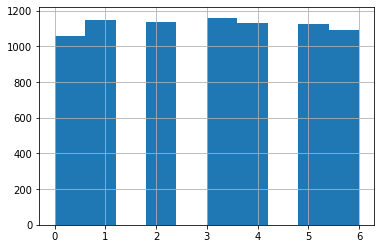

In [6]:
targetS.hist()

## Realizando 30 rodadas de Teste com KNN


- RODADA 0 - Semente 5738 -

- Acurácia 0.7181663837011885 -
- Sensibilidade [0.71176471 0.57771261 0.70029674 0.79538905 0.52011494 0.79573171
 0.94920635] -

              precision    recall  f1-score   support

      Normal       0.74      0.71      0.73       340
        HI-1       0.49      0.58      0.53       341
        HI-2       0.72      0.70      0.71       337
        HI-3       0.80      0.80      0.80       347
        LI-1       0.56      0.52      0.54       348
        LI-2       0.82      0.80      0.81       328
        LI-3       0.97      0.95      0.96       315

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


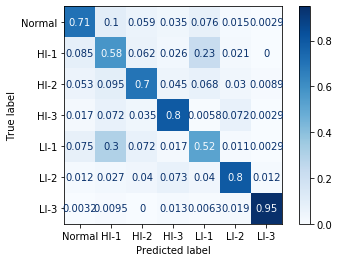


- RODADA 1 - Semente 5410 -

- Acurácia 0.7211375212224108 -
- Sensibilidade [0.69794721 0.58456973 0.70426829 0.78078078 0.52124646 0.81504702
 0.95362319] -

              precision    recall  f1-score   support

      Normal       0.71      0.70      0.70       341
        HI-1       0.50      0.58      0.54       337
        HI-2       0.69      0.70      0.70       328
        HI-3       0.80      0.78      0.79       333
        LI-1       0.58      0.52      0.55       353
        LI-2       0.84      0.82      0.83       319
        LI-3       0.97      0.95      0.96       345

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


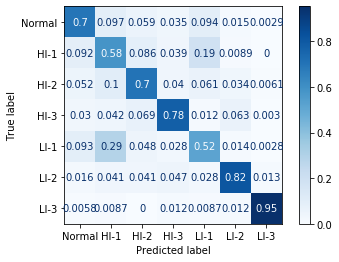


- RODADA 2 - Semente 7377 -

- Acurácia 0.7147707979626485 -
- Sensibilidade [0.70030581 0.50862069 0.72566372 0.83483483 0.54857143 0.76452599
 0.93975904] -

              precision    recall  f1-score   support

      Normal       0.70      0.70      0.70       327
        HI-1       0.50      0.51      0.50       348
        HI-2       0.70      0.73      0.71       339
        HI-3       0.79      0.83      0.81       333
        LI-1       0.56      0.55      0.55       350
        LI-2       0.82      0.76      0.79       327
        LI-3       0.97      0.94      0.95       332

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


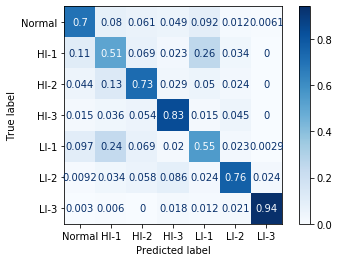


- RODADA 3 - Semente 1565 -

- Acurácia 0.7258064516129032 -
- Sensibilidade [0.72611465 0.56586826 0.71044776 0.77715877 0.57681159 0.7752809
 0.96166134] -

              precision    recall  f1-score   support

      Normal       0.67      0.73      0.70       314
        HI-1       0.52      0.57      0.54       334
        HI-2       0.70      0.71      0.70       335
        HI-3       0.83      0.78      0.80       359
        LI-1       0.59      0.58      0.58       345
        LI-2       0.84      0.78      0.80       356
        LI-3       0.97      0.96      0.97       313

    accuracy                           0.73      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.73      0.73      2356

Matriz de confusão normalizada


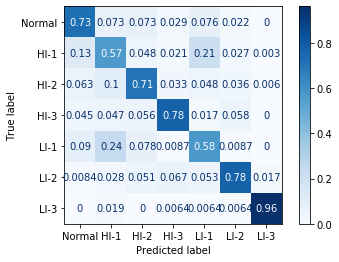


- RODADA 4 - Semente 7760 -

- Acurácia 0.7139219015280136 -
- Sensibilidade [0.72136223 0.56460674 0.68059701 0.75308642 0.56213018 0.77521614
 0.95195195] -

              precision    recall  f1-score   support

      Normal       0.70      0.72      0.71       323
        HI-1       0.53      0.56      0.55       356
        HI-2       0.68      0.68      0.68       335
        HI-3       0.79      0.75      0.77       324
        LI-1       0.56      0.56      0.56       338
        LI-2       0.79      0.78      0.78       347
        LI-3       0.98      0.95      0.96       333

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


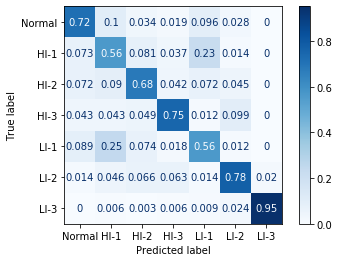


- RODADA 5 - Semente 5623 -

- Acurácia 0.7088285229202037 -
- Sensibilidade [0.69592476 0.60683761 0.70481928 0.74848485 0.54189944 0.75443787
 0.92987805] -

              precision    recall  f1-score   support

      Normal       0.65      0.70      0.67       319
        HI-1       0.53      0.61      0.57       351
        HI-2       0.67      0.70      0.69       332
        HI-3       0.77      0.75      0.76       330
        LI-1       0.59      0.54      0.57       358
        LI-2       0.83      0.75      0.79       338
        LI-3       0.98      0.93      0.95       328

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


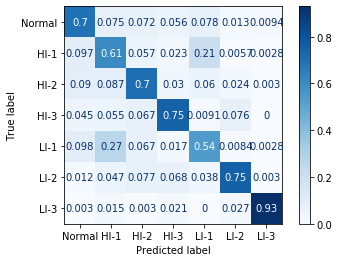


- RODADA 6 - Semente 7743 -

- Acurácia 0.7245331069609507 -
- Sensibilidade [0.71826625 0.56363636 0.70241287 0.82191781 0.52866242 0.77491961
 0.94117647] -

              precision    recall  f1-score   support

      Normal       0.69      0.72      0.71       323
        HI-1       0.51      0.56      0.53       330
        HI-2       0.72      0.70      0.71       373
        HI-3       0.83      0.82      0.82       365
        LI-1       0.53      0.53      0.53       314
        LI-2       0.83      0.77      0.80       311
        LI-3       1.00      0.94      0.97       340

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


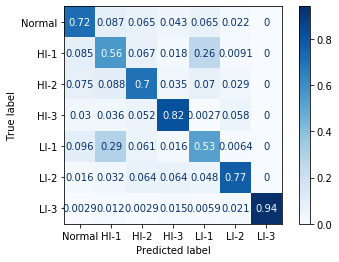


- RODADA 7 - Semente 3952 -

- Acurácia 0.7275042444821732 -
- Sensibilidade [0.74503311 0.5968254  0.68870523 0.7971831  0.512      0.81072555
 0.96960486] -

              precision    recall  f1-score   support

      Normal       0.69      0.75      0.72       302
        HI-1       0.48      0.60      0.53       315
        HI-2       0.70      0.69      0.69       363
        HI-3       0.85      0.80      0.82       355
        LI-1       0.62      0.51      0.56       375
        LI-2       0.83      0.81      0.82       317
        LI-3       0.99      0.97      0.98       329

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


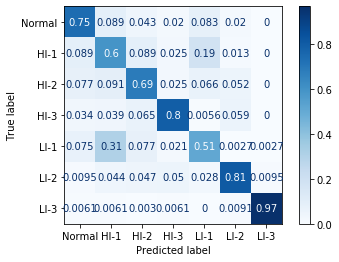


- RODADA 8 - Semente 5470 -

- Acurácia 0.7088285229202037 -
- Sensibilidade [0.70149254 0.56716418 0.70473538 0.81556196 0.52994012 0.72093023
 0.94039735] -

              precision    recall  f1-score   support

      Normal       0.66      0.70      0.68       335
        HI-1       0.46      0.57      0.51       335
        HI-2       0.72      0.70      0.71       359
        HI-3       0.84      0.82      0.83       347
        LI-1       0.55      0.53      0.54       334
        LI-2       0.86      0.72      0.78       344
        LI-3       0.97      0.94      0.95       302

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


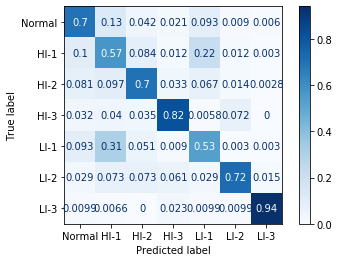


- RODADA 9 - Semente 1521 -

- Acurácia 0.7126485568760611 -
- Sensibilidade [0.7029703  0.57100592 0.66975309 0.78947368 0.55840456 0.74792244
 0.9495549 ] -

              precision    recall  f1-score   support

      Normal       0.67      0.70      0.68       303
        HI-1       0.48      0.57      0.52       338
        HI-2       0.71      0.67      0.69       324
        HI-3       0.78      0.79      0.78       342
        LI-1       0.59      0.56      0.58       351
        LI-2       0.85      0.75      0.80       361
        LI-3       0.96      0.95      0.95       337

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


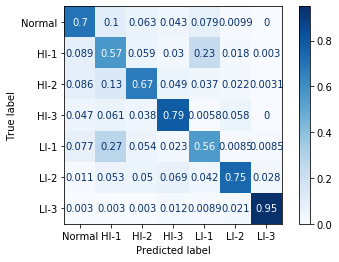


- RODADA 10 - Semente 2704 -

- Acurácia 0.7007640067911715 -
- Sensibilidade [0.73825503 0.52556818 0.69275362 0.71130952 0.53079179 0.76900585
 0.94736842] -

              precision    recall  f1-score   support

      Normal       0.65      0.74      0.69       298
        HI-1       0.52      0.53      0.52       352
        HI-2       0.68      0.69      0.68       345
        HI-3       0.75      0.71      0.73       336
        LI-1       0.55      0.53      0.54       341
        LI-2       0.79      0.77      0.78       342
        LI-3       0.97      0.95      0.96       342

    accuracy                           0.70      2356
   macro avg       0.70      0.70      0.70      2356
weighted avg       0.70      0.70      0.70      2356

Matriz de confusão normalizada


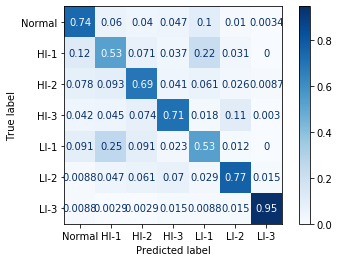


- RODADA 11 - Semente 3961 -

- Acurácia 0.716044142614601 -
- Sensibilidade [0.69496855 0.59752322 0.68373494 0.76601671 0.56521739 0.76176471
 0.93510324] -

              precision    recall  f1-score   support

      Normal       0.69      0.69      0.69       318
        HI-1       0.50      0.60      0.54       323
        HI-2       0.70      0.68      0.69       332
        HI-3       0.77      0.77      0.77       359
        LI-1       0.59      0.57      0.58       345
        LI-2       0.81      0.76      0.79       340
        LI-3       1.00      0.94      0.96       339

    accuracy                           0.72      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


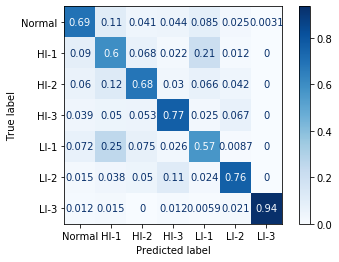


- RODADA 12 - Semente 7657 -

- Acurácia 0.7232597623089984 -
- Sensibilidade [0.75895765 0.54347826 0.65781711 0.84149856 0.54651163 0.81469649
 0.9260355 ] -

              precision    recall  f1-score   support

      Normal       0.67      0.76      0.71       307
        HI-1       0.51      0.54      0.53       368
        HI-2       0.70      0.66      0.68       339
        HI-3       0.82      0.84      0.83       347
        LI-1       0.60      0.55      0.57       344
        LI-2       0.81      0.81      0.81       313
        LI-3       0.99      0.93      0.96       338

    accuracy                           0.72      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


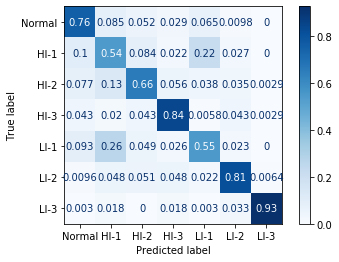


- RODADA 13 - Semente 2734 -

- Acurácia 0.7207130730050934 -
- Sensibilidade [0.73701299 0.57803468 0.67073171 0.77624309 0.58702065 0.76764706
 0.93093093] -

              precision    recall  f1-score   support

      Normal       0.67      0.74      0.70       308
        HI-1       0.53      0.58      0.55       346
        HI-2       0.73      0.67      0.70       328
        HI-3       0.81      0.78      0.79       362
        LI-1       0.57      0.59      0.58       339
        LI-2       0.81      0.77      0.79       340
        LI-3       0.97      0.93      0.95       333

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


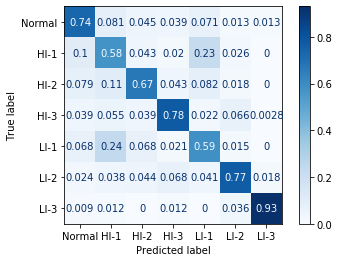


- RODADA 14 - Semente 5402 -

- Acurácia 0.7181663837011885 -
- Sensibilidade [0.75179856 0.55807365 0.66106443 0.78208955 0.56198347 0.78287462
 0.95626822] -

              precision    recall  f1-score   support

      Normal       0.64      0.75      0.69       278
        HI-1       0.52      0.56      0.54       353
        HI-2       0.70      0.66      0.68       357
        HI-3       0.83      0.78      0.80       335
        LI-1       0.58      0.56      0.57       363
        LI-2       0.83      0.78      0.81       327
        LI-3       0.98      0.96      0.97       343

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


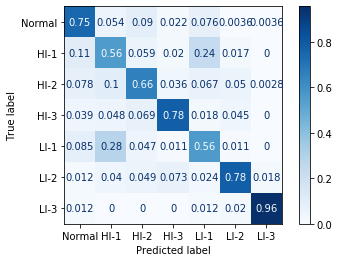


- RODADA 15 - Semente 7937 -

- Acurácia 0.7228353140916808 -
- Sensibilidade [0.72204473 0.54848485 0.7245509  0.76243094 0.59485531 0.74238227
 0.94202899] -

              precision    recall  f1-score   support

      Normal       0.68      0.72      0.70       313
        HI-1       0.51      0.55      0.53       330
        HI-2       0.69      0.72      0.71       334
        HI-3       0.82      0.76      0.79       362
        LI-1       0.56      0.59      0.58       311
        LI-2       0.85      0.74      0.79       361
        LI-3       0.97      0.94      0.96       345

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.73      2356

Matriz de confusão normalizada


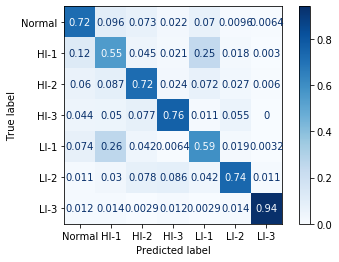


- RODADA 16 - Semente 803 -

- Acurácia 0.7224108658743633 -
- Sensibilidade [0.65915493 0.60641399 0.71202532 0.78386167 0.53582555 0.80966767
 0.94169096] -

              precision    recall  f1-score   support

      Normal       0.74      0.66      0.70       355
        HI-1       0.52      0.61      0.56       343
        HI-2       0.68      0.71      0.70       316
        HI-3       0.81      0.78      0.80       347
        LI-1       0.55      0.54      0.54       321
        LI-2       0.80      0.81      0.81       331
        LI-3       0.98      0.94      0.96       343

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


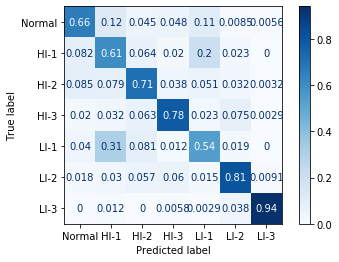


- RODADA 17 - Semente 1522 -

- Acurácia 0.7134974533106961 -
- Sensibilidade [0.70125786 0.54599407 0.71428571 0.79213483 0.55747126 0.75811209
 0.93009119] -

              precision    recall  f1-score   support

      Normal       0.69      0.70      0.70       318
        HI-1       0.48      0.55      0.51       337
        HI-2       0.71      0.71      0.71       329
        HI-3       0.81      0.79      0.80       356
        LI-1       0.55      0.56      0.55       348
        LI-2       0.85      0.76      0.80       339
        LI-3       0.97      0.93      0.95       329

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


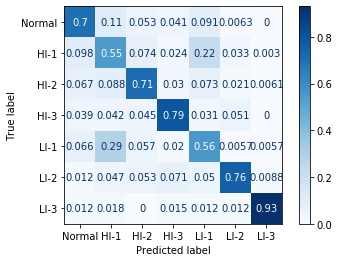


- RODADA 18 - Semente 3941 -

- Acurácia 0.7304753820033956 -
- Sensibilidade [0.72392638 0.60597015 0.69005848 0.81415929 0.55192878 0.78151261
 0.953125  ] -

              precision    recall  f1-score   support

      Normal       0.71      0.72      0.72       326
        HI-1       0.50      0.61      0.55       335
        HI-2       0.72      0.69      0.71       342
        HI-3       0.80      0.81      0.80       339
        LI-1       0.59      0.55      0.57       337
        LI-2       0.88      0.78      0.83       357
        LI-3       0.97      0.95      0.96       320

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


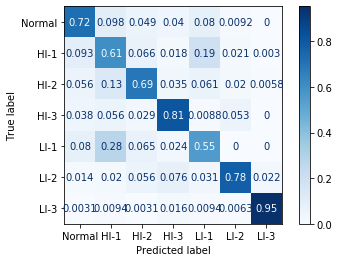


- RODADA 19 - Semente 1462 -

- Acurácia 0.7164685908319185 -
- Sensibilidade [0.69883041 0.58213256 0.68072289 0.76010782 0.55287009 0.79937304
 0.95859873] -

              precision    recall  f1-score   support

      Normal       0.71      0.70      0.71       342
        HI-1       0.52      0.58      0.55       347
        HI-2       0.69      0.68      0.68       332
        HI-3       0.81      0.76      0.78       371
        LI-1       0.56      0.55      0.56       331
        LI-2       0.81      0.80      0.80       319
        LI-3       0.96      0.96      0.96       314

    accuracy                           0.72      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


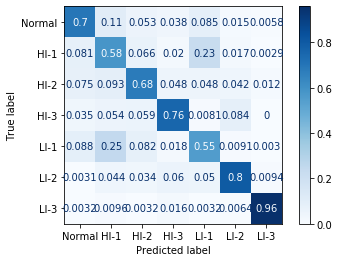


- RODADA 20 - Semente 6994 -

- Acurácia 0.7232597623089984 -
- Sensibilidade [0.740625   0.59279778 0.68769716 0.79532164 0.56948229 0.77183099
 0.95238095] -

              precision    recall  f1-score   support

      Normal       0.71      0.74      0.72       320
        HI-1       0.56      0.59      0.58       361
        HI-2       0.66      0.69      0.68       317
        HI-3       0.81      0.80      0.80       342
        LI-1       0.61      0.57      0.59       367
        LI-2       0.80      0.77      0.79       355
        LI-3       0.95      0.95      0.95       294

    accuracy                           0.72      2356
   macro avg       0.73      0.73      0.73      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


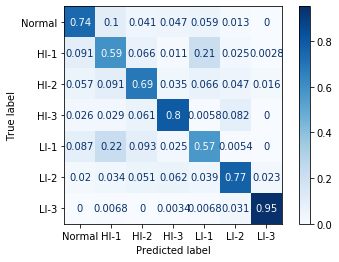


- RODADA 21 - Semente 7685 -

- Acurácia 0.7084040747028862 -
- Sensibilidade [0.75342466 0.57063712 0.7150838  0.75786164 0.50549451 0.75144509
 0.95268139] -

              precision    recall  f1-score   support

      Normal       0.65      0.75      0.70       292
        HI-1       0.51      0.57      0.54       361
        HI-2       0.72      0.72      0.72       358
        HI-3       0.74      0.76      0.75       318
        LI-1       0.59      0.51      0.55       364
        LI-2       0.82      0.75      0.78       346
        LI-3       0.98      0.95      0.96       317

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


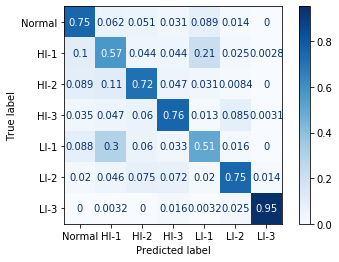


- RODADA 22 - Semente 5553 -

- Acurácia 0.7130730050933786 -
- Sensibilidade [0.71835443 0.56797583 0.6849711  0.80066445 0.54959786 0.74550898
 0.93802817] -

              precision    recall  f1-score   support

      Normal       0.72      0.72      0.72       316
        HI-1       0.48      0.57      0.52       331
        HI-2       0.67      0.68      0.68       346
        HI-3       0.75      0.80      0.78       301
        LI-1       0.63      0.55      0.59       373
        LI-2       0.80      0.75      0.77       334
        LI-3       0.98      0.94      0.96       355

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada


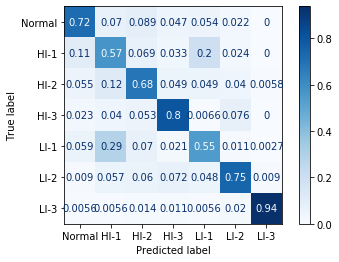


- RODADA 23 - Semente 2031 -

- Acurácia 0.7122241086587436 -
- Sensibilidade [0.78571429 0.60220994 0.6984127  0.74719101 0.49591281 0.76506024
 0.93670886] -

              precision    recall  f1-score   support

      Normal       0.70      0.79      0.74       308
        HI-1       0.51      0.60      0.55       362
        HI-2       0.70      0.70      0.70       315
        HI-3       0.78      0.75      0.76       356
        LI-1       0.60      0.50      0.54       367
        LI-2       0.80      0.77      0.78       332
        LI-3       0.96      0.94      0.95       316

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


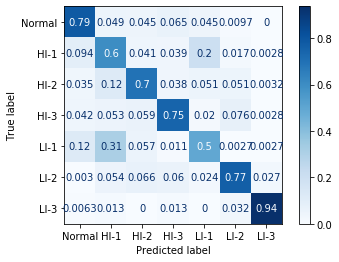


- RODADA 24 - Semente 231 -

- Acurácia 0.717741935483871 -
- Sensibilidade [0.75163399 0.55742297 0.68169014 0.76676385 0.56074766 0.78197674
 0.93333333] -

              precision    recall  f1-score   support

      Normal       0.67      0.75      0.71       306
        HI-1       0.51      0.56      0.53       357
        HI-2       0.69      0.68      0.69       355
        HI-3       0.83      0.77      0.80       343
        LI-1       0.56      0.56      0.56       321
        LI-2       0.85      0.78      0.81       344
        LI-3       0.97      0.93      0.95       330

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.72      0.72      0.72      2356

Matriz de confusão normalizada


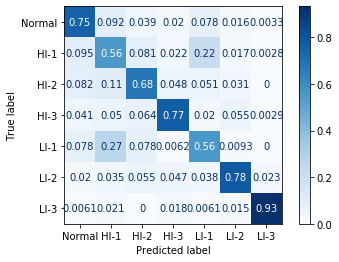


- RODADA 25 - Semente 3329 -

- Acurácia 0.7211375212224108 -
- Sensibilidade [0.72641509 0.57230769 0.65507246 0.77595628 0.56748466 0.78529412
 0.95238095] -

              precision    recall  f1-score   support

      Normal       0.69      0.73      0.71       318
        HI-1       0.48      0.57      0.52       325
        HI-2       0.72      0.66      0.68       345
        HI-3       0.81      0.78      0.79       366
        LI-1       0.58      0.57      0.57       326
        LI-2       0.84      0.79      0.81       340
        LI-3       0.98      0.95      0.97       336

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


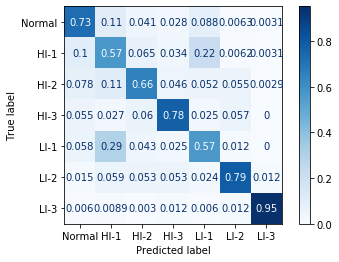


- RODADA 26 - Semente 2639 -

- Acurácia 0.732597623089983 -
- Sensibilidade [0.74351585 0.58823529 0.71559633 0.79824561 0.55120482 0.78097983
 0.95638629] -

              precision    recall  f1-score   support

      Normal       0.72      0.74      0.73       347
        HI-1       0.53      0.59      0.56       340
        HI-2       0.72      0.72      0.72       327
        HI-3       0.77      0.80      0.79       342
        LI-1       0.60      0.55      0.57       332
        LI-2       0.85      0.78      0.82       347
        LI-3       0.96      0.96      0.96       321

    accuracy                           0.73      2356
   macro avg       0.74      0.73      0.73      2356
weighted avg       0.74      0.73      0.73      2356

Matriz de confusão normalizada


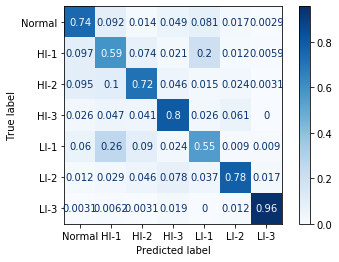


- RODADA 27 - Semente 1750 -

- Acurácia 0.7202886247877759 -
- Sensibilidade [0.7125     0.55718475 0.6809816  0.8        0.54310345 0.79069767
 0.95906433] -

              precision    recall  f1-score   support

      Normal       0.69      0.71      0.70       320
        HI-1       0.49      0.56      0.52       341
        HI-2       0.65      0.68      0.67       326
        HI-3       0.81      0.80      0.81       335
        LI-1       0.60      0.54      0.57       348
        LI-2       0.87      0.79      0.83       344
        LI-3       0.96      0.96      0.96       342

    accuracy                           0.72      2356
   macro avg       0.73      0.72      0.72      2356
weighted avg       0.73      0.72      0.72      2356

Matriz de confusão normalizada


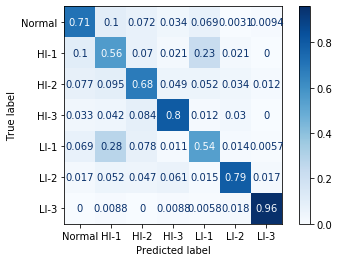


- RODADA 28 - Semente 2799 -

- Acurácia 0.7054329371816639 -
- Sensibilidade [0.69902913 0.55163043 0.69875776 0.78005865 0.55457227 0.73802817
 0.9378882 ] -

              precision    recall  f1-score   support

      Normal       0.66      0.70      0.68       309
        HI-1       0.52      0.55      0.54       368
        HI-2       0.62      0.70      0.66       322
        HI-3       0.80      0.78      0.79       341
        LI-1       0.56      0.55      0.56       339
        LI-2       0.85      0.74      0.79       355
        LI-3       0.99      0.94      0.96       322

    accuracy                           0.71      2356
   macro avg       0.72      0.71      0.71      2356
weighted avg       0.71      0.71      0.71      2356

Matriz de confusão normalizada


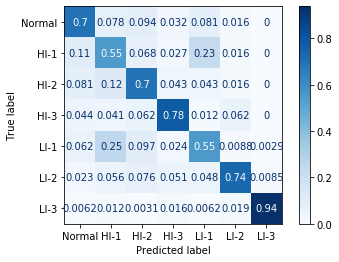


- RODADA 29 - Semente 3753 -

- Acurácia 0.7139219015280136 -
- Sensibilidade [0.69899666 0.57894737 0.69501466 0.81345566 0.50135501 0.78947368
 0.95535714] -

              precision    recall  f1-score   support

      Normal       0.63      0.70      0.66       299
        HI-1       0.50      0.58      0.54       361
        HI-2       0.72      0.70      0.71       341
        HI-3       0.78      0.81      0.80       327
        LI-1       0.62      0.50      0.55       369
        LI-2       0.81      0.79      0.80       323
        LI-3       0.98      0.96      0.97       336

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada


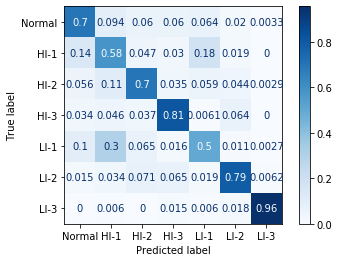

In [7]:
accuracy, recall, confusion = test_30_knn(x=chainDF.values, y=targetS.values, y_labels=target_labels, k_vizinhos=5)

## Gerando DataFrame de Acurácia e Sensibilidade por rodada

In [8]:
metricDF = pd.DataFrame(
    data=recall,
    columns=[f'S - {name}' for name in target_labels])

metricDF['Acurácia'] = accuracy
metricDF

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
0,0.711765,0.577713,0.700297,0.795389,0.520115,0.795732,0.949206,0.718166
1,0.697947,0.584570,0.704268,0.780781,0.521246,0.815047,0.953623,0.721138
2,0.700306,0.508621,0.725664,0.834835,0.548571,0.764526,0.939759,0.714771
3,0.726115,0.565868,0.710448,0.777159,0.576812,0.775281,0.961661,0.725806
4,0.721362,0.564607,0.680597,0.753086,0.562130,0.775216,0.951952,0.713922
5,0.695925,0.606838,0.704819,0.748485,0.541899,0.754438,0.929878,0.708829
6,0.718266,0.563636,0.702413,0.821918,0.528662,0.774920,0.941176,0.724533
7,0.745033,0.596825,0.688705,0.797183,0.512000,0.810726,0.969605,0.727504
8,0.701493,0.567164,0.704735,0.815562,0.529940,0.720930,0.940397,0.708829
9,0.702970,0.571006,0.669753,0.789474,0.558405,0.747922,0.949555,0.712649


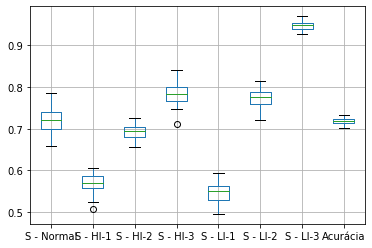

In [17]:
metricDF.boxplot()

In [10]:
metricDF.describe()

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.721253,0.571262,0.693091,0.784641,0.546107,0.774069,0.946075,0.717629
std,0.025912,0.023673,0.018853,0.028009,0.024299,0.023570,0.010969,0.007336
min,0.659155,0.508621,0.655072,0.711310,0.495913,0.720930,0.926036,0.700764
25%,0.700544,0.557586,0.681159,0.766203,0.530153,0.759025,0.937923,0.713179
50%,0.719858,0.570822,0.693884,0.782976,0.550401,0.775068,0.948287,0.717954
75%,0.740033,0.587319,0.704798,0.799561,0.561675,0.788429,0.953499,0.722729
max,0.785714,0.606838,0.725664,0.841499,0.594855,0.815047,0.969605,0.732598


## Gerando _DataFrame_ da matriz de confusão por rodada

In [11]:
confusion_resized = np.resize(confusion, (30, 49))

confusion_labels = [f"T {truelabel} x P {predlabel}" for truelabel in target_labels for predlabel in target_labels]

confusionTurnDF = pd.DataFrame(
    data=confusion_resized,
    columns=confusion_labels
)

confusionTurnDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
T Normal x P Normal,30.0,228.766667,10.421077,209.0,222.25,228.5,234.75,258.0
T Normal x P HI-1,30.0,28.700000,7.071799,15.0,24.25,29.0,33.00,44.0
T Normal x P HI-2,30.0,17.466667,5.393056,5.0,13.25,16.5,20.75,29.0
T Normal x P HI-3,30.0,12.033333,4.029917,6.0,9.00,12.5,14.75,20.0
T Normal x P LI-1,30.0,25.200000,5.142118,14.0,22.00,25.0,28.75,39.0
T Normal x P LI-2,30.0,4.366667,1.991072,1.0,3.00,4.0,5.75,9.0
T Normal x P LI-3,30.0,0.966667,1.098065,0.0,0.00,1.0,1.75,4.0
T HI-1 x P Normal,30.0,34.166667,5.285526,26.0,30.25,34.0,36.75,51.0
T HI-1 x P HI-1,30.0,196.566667,10.234099,177.0,188.25,197.0,202.75,218.0
T HI-1 x P HI-2,30.0,22.566667,4.530992,15.0,20.25,22.5,25.00,31.0


## Matriz de confusão média

In [12]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_sum = sum(confusion)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_mean = [[x / 30 for x in line] for line in confusion_sum]

confusionDF = pd.DataFrame(
    data=confusion_mean,
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,228.766667,28.700000,17.466667,12.033333,25.200000,4.366667,0.966667
True - HI-1,34.166667,196.566667,22.566667,8.733333,75.100000,6.566667,0.500000
True - HI-2,23.833333,35.200000,234.033333,13.266667,19.033333,10.966667,1.366667
True - HI-3,12.366667,15.433333,18.933333,269.900000,4.700000,22.366667,0.300000
True - LI-1,27.900000,94.533333,23.466667,6.500000,188.266667,3.666667,0.733333
True - LI-2,4.733333,14.233333,19.200000,22.500000,11.133333,261.366667,4.733333
True - LI-3,1.600000,3.233333,0.566667,4.200000,1.900000,6.300000,311.833333


## Matriz de confusão média normalizada

In [13]:
confusionNormDF = pd.DataFrame(
    data=[normalize(row) for row in confusion_mean],
    columns=[f'P - {label}' for label in target_labels],
    index=[f'True - {label}' for label in target_labels]
)

confusionNormDF

,P - Normal,P - HI-1,P - HI-2,P - HI-3,P - LI-1,P - LI-2,P - LI-3
True - Normal,0.720525,0.090394,0.055013,0.037900,0.079370,0.013753,0.003045
True - HI-1,0.099264,0.571083,0.065563,0.025373,0.218187,0.019078,0.001453
True - HI-2,0.070575,0.104235,0.693021,0.039285,0.056362,0.032475,0.004047
True - HI-3,0.035950,0.044864,0.055039,0.784593,0.013663,0.065019,0.000872
True - LI-1,0.080854,0.273957,0.068006,0.018837,0.545595,0.010626,0.002125
True - LI-2,0.014008,0.042123,0.056822,0.066588,0.032949,0.773503,0.014008
True - LI-3,0.004854,0.009809,0.001719,0.012741,0.005764,0.019112,0.946001


## Gerando _DataFrame_ da matriz de confusão binarizada por rodada

In [14]:
confusionBinary = [binarize(matrix) for matrix in confusion]

confusionBinaryDF = pd.DataFrame(
    data=np.resize(confusionBinary, (30, 4)),
    columns=['true normal', 'false fail','false normal', 'true fail']
)

confusionBinaryDF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
true normal,30.0,228.766667,10.421077,209.0,222.25,228.5,234.75,258.0
false fail,30.0,88.733333,11.578617,66.0,81.50,90.0,96.50,121.0
false normal,30.0,104.600000,10.717694,81.0,98.00,104.5,112.75,123.0
true fail,30.0,1933.900000,12.488201,1902.0,1930.50,1935.0,1939.00,1960.0


## Matriz de confusão binarizada média

In [15]:
# Matriz com o somatório das 30 matrizes de confusão
confusion_binary_sum = sum(confusionBinary)

# Matriz com média aritmética das 30 marizes de confusão 
confusion_binary_mean = [[x / 30 for x in line] for line in confusion_binary_sum]

confusionBDF = pd.DataFrame(
    data=confusion_binary_mean,
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,228.766667,88.733333
True-Fail,104.600000,1933.900000


## Matriz de confusão binarizada média normalizada

In [16]:
confusionBDF = pd.DataFrame(
    data=[normalize(row) for row in confusion_binary_mean],
    columns=['Pred-Normal', 'Pred-Fail'],
    index=['True-Normal', 'True-Fail']
)

confusionBDF

,Pred-Normal,Pred-Fail
True-Normal,0.720525,0.279475
True-Fail,0.051312,0.948688
